# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [8]:
# Selected three random customers from sample
indices = [5, 88, 274]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices, :], columns = data.keys()).reset_index(drop = True)
samples.dropna(axis=1, how='any')
print("Chosen samples of wholesale customers dataset: ")
display(samples)

print("Comparison of data mean values to sample values across product categories:")
display(samples - np.around(data.mean().values))

Chosen samples of wholesale customers dataset: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,7864,542,4042,9735,165,46
2,894,1703,1841,744,759,1153


Comparison of data mean values to sample values across product categories:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-2587.0,2463.0,-2825.0,-2406.0,-1086.0,-74.0
1,-4136.0,-5254.0,-3909.0,6663.0,-2716.0,-1479.0
2,-11106.0,-4093.0,-6110.0,-2328.0,-2122.0,-372.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** As noted in the project description, we are looking at annual spending amounts for the different product categories since understanding the variation in products can help optimize delivery routes. For customers who are restocking a significant number of products or are using up fresh products daily, infrequent deliveries may significantly hamper business while for other customers, daily deliveries may be unnecessary.

To identify potential categories of customers for the sample data, we can specifically compare how the sample means differ from the overall data set’s mean values for each category. The average spend for each product category can help identify whether a customer has clear spending patterns that differ from the rest of the observations in specific categories giving a better assessment of whether they are a convenience store restocking certain products daily, a restaurant dependent on having fresh produce to serve meals or a large-scale grocery store that may have a lag in inventory turnover. In addition, since we are going to be employing the K-means clustering algorithm to determine potential categories further, looking at minimizing in-cluster variance with squared Euclidean distance, the means of the data set are important.

* Index 0: This appears to be a cafe based on the higher than average spend on milk with lower than average spends across all other product categories. A cafe with this average spend would also be relatively high in terms of delicatessen product spend when compared to the average of all other customers since the cafe likely serves breakfast and lunch, mking it a de facto cafe/delicatessen.

* Index 1: There's a relatively high spend on frozen goods that is significantly above the data set's average and so I would guess it is likely a fast food restaurant.

* Index 2: I would guess based on the deviation from the average spend, with lower spends on all categories, that this is likely a convenience store since it does not have to have the same amount of inventory as the other types of customers and in fact, could be a convenience store that is also a gasoline station, giving more of a clue as to why there is such a difference with the data set averages.

One thing to note about the comparison using the data set mean is that it could be skewed due to the presence of outliers hence this initial assessment of customer types should be considered a preliminary assessment with further analysis necessary.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [9]:
# Copied the DataFrame, using the 'drop' function to drop the given feature
detergents = data.loc[:,'Detergents_Paper']
new_data = pd.DataFrame(data).drop('Detergents_Paper', axis=1)

# Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split

features = new_data
target = detergents
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

# Created a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.677551695616


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I decided to remove the “Detergents_Paper” feature and found that the remaining features were highly predictive with an adjusted R-squared score of 0.658161254582. It is important to note that R-squared compares the explanatory powers of the model with a different set of predictors and the adjusted R-squared accounts for the numbers of predictors as it increases only if the new terms improves the model more than would be expected by chance. Buying amounts for other features in the data set are able to predict proportional purchasing for “Detergents_Paper” which is important as it establishes that there may be a relationship between one or more features and “Detergents_Paper”. This could be useful later on in our cluster analysis depending upon what dissimilarity measure selected since something like correlation-based distance will show observations to be similar if their features are highly correlated. If we were to use Euclidean distance for example, the clustering algorithm might choose to put high-volume purchases together meaning that large grocery stores could be grouped with large fast food chains and thus give the same delivery schedule to two very different clients due to the total volume they spend with the distributor. Correlation-based distance might group customer types of different sizes but find similar purchasing patterns meaning that it would be more likely for these types of customers to be on delivery schedules that are conducive to their sales cycle, such as a large fast food chain and small delicatessen that both want to get food available for same day sales.  That being said, if other features are able to predict amounts for "Detergents_Paper", this indicates multicollinearity meaning that one can be linearly predicted from the others with a substantial degree of accuracy and thus the feature would not be important in distinguishing our feature set clusters.

Just as an aside, I tried a few other features and was able to find that for example, the “Fresh” feature’s adjusted R-squared score was actually negative meaning that the other features in the model did not fit the data at all. If we were to consider feature distributions and focus on Euclidean distance, correlations between features would indicate that a feature would not be relevant for identifying a specific customer so "Fresh" could be of importance moving forward.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

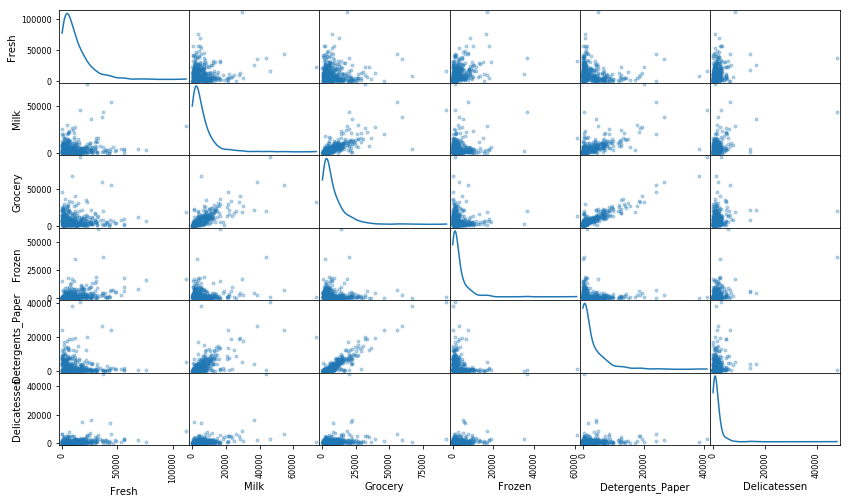

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Looking at the distributions of the scatter matrix, the features are positively skewed and thus require a log transformation to reduce the skewness. In terms of correlations between features, there looks to be a positive correlation between “Detergents_Paper” and “Grocery” as well as possibly “Milk” and “Grocery” though this correlation is not as pronounced as the former.

With regard to the importance of "Detergents_Paper", it is not relevant for further analysis, confirming something I noted in Question 2 as its positive correlation with "Grocery" indicates that you could discard either one of those variables and still use the remaining variables to predict the remaining one.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

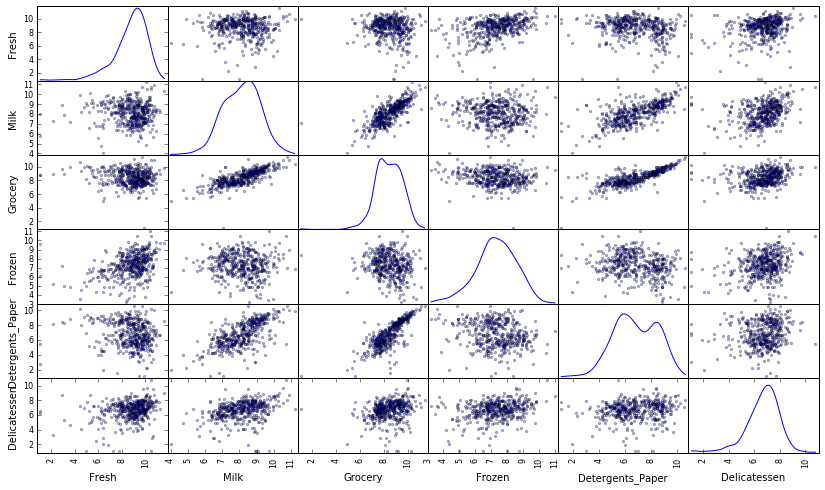

In [10]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
1,8.970051,6.295266,8.304495,9.183483,5.105945,3.828641
2,6.795706,7.440147,7.518064,6.612041,6.632002,7.050123


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [37]:
# For each feature find the data points with extreme high or low values
indices_outliers = []
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    indices_outliers.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.get_values())
    
    # Display the outliers as a check on for loop
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

# Create outliers list with values that appear more than once in product categories
combined_indices_outliers = [item for sublist in indices_outliers for item in sublist]
outliers_for_exclusion = list(set([x for x in combined_indices_outliers if combined_indices_outliers.count(x) > 1]))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers_for_exclusion]).reset_index(drop = True)
display(good_data.head())

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** The outliers for this data set were removed because they were determined to be outside the interquartile range, which represents a range of three quarters of the way through the data minus a quarter of the way through the data (IQR = Q3 - Q1) thus showing the spread of the data around the media. This allows us to create the interquartile rule which simply uses the interquartile range multiplied times 1.5 to create a step. The analysis can then detect outliers by adding this step to the third quartile (Q3) and any number greater than this is a suspected outlier while the step is subtracted from the first quartile (Q1)  and any number less than this is a suspected outlier.

An issue that arises from a strict outlier interpretation is that if we eliminate an outlier that appears in just one of the variables, you will eliminate approximately 10% of the data set. A better approach implemented here is to only eliminate those observations that appear as outlets in more than one product category. 

One question that I also considered briefly is whether or not we should only eliminate those outliers that appear as outliers in more than one variable or if we should eliminate points that are outside the 1% to 99% data range (more arbitrary but put into practice fairly often). Based on time, I probably would have run the modeling activity on all observations and the subset since there aren’t a ton of observations here but I wanted to simulate real-world conditions that would force us to either choose one path or the other. I would also note that the exclusion of outliers influenced the clustering algorithm I selected as noted later in the analysis.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

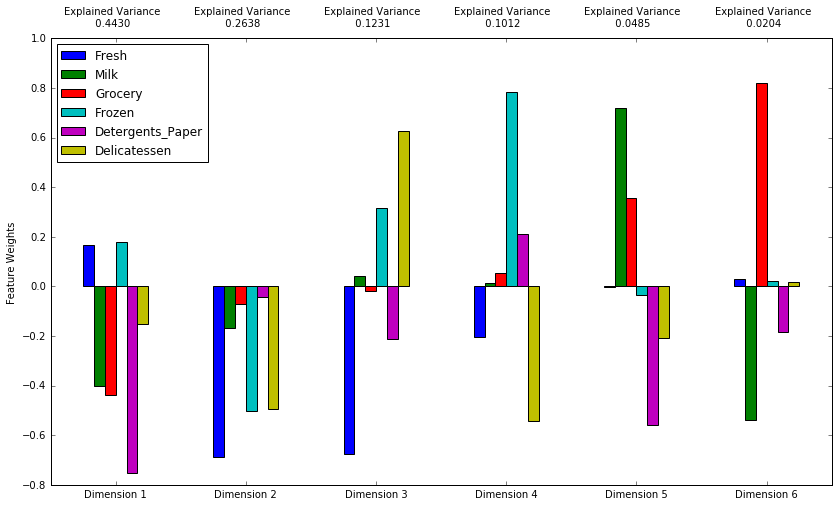

In [19]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  

**Answer:**The first two principal components explain approximately 70.7% of the variance in the data, with the first principal component explaining 44.3% of the variance and the second principal component explaining 26.4% of the variance, respectively. When you include the third and fourth principal components, you account for approximately 93.1% of the variance


Answer: The first principal component explains 44.3% of the variance, and the second principal component is responsible for 26.4%. Together the first 2 account for 70.7% of all variance in the data. When you include the 3rd and 4th principal component (12.3% and 10.1% respectively) we've now accounted for 93.1%. It looks like the first dimension is heavily reliant on Detergents, Grocery, and Milk, which are the 3 features we identified above as being most highly correlated. The second dimension appears to be orthogonal to the first, reducing the impact of Milk, Grocery, and Detergents, and instead relying on variation in Fresh, Frozen, and Deli items. The third dimension appears to be low Fresh spending and high Deli spending, and the 4th is a similar high/low continuum for low Deli, high Frozen.

Surprisingly, the first and second principal components explain all of the variance in the data (Dimension 1 - 0.7937 + Dimension 2 - 0.2063 = 1.0), which is incredibly rare but is important as this indicates that proceeding with just the first two principal components is enough to get a pretty accurate summary of the data using these two dimensions and does not require the third or fourth dimension to explain customer spending.
Though there is no well-accepted objective method to determine how many principal components are enough, you would usually select the smallest number of principal components that are required in order to explain a sizable amount of variation in the data. Another visual method outside of the visualization above would be to look at a scree plot looking for a point where the proportion of variance explained by each subsequent principal component drops off, also known as the elbow in the scree plot.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3
0,-2.1326,-1.3942,0.0
1,3.4342,-0.2446,0.0
2,-1.3017,1.6388,0.0


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [25]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [26]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.0850,-0.3243
1,2.8711,0.7355
2,0.3042,1.7216


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

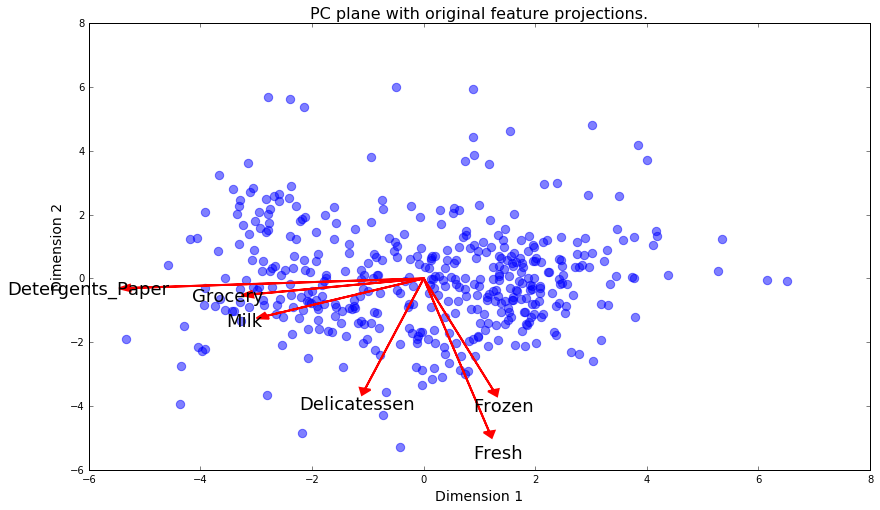

In [27]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

Based on the biplot above, Dimension 1 places most of its weight on Detergents_Paper, Grocery, and Milk while placing much less weight on Delicatessen, Fresh and Frozen. Dimension 2 places most of its weight on Delicatessen, Fresh and Frozen. The most interesting note from the biplot is the similarity in directions for Frozen and Fresh, two products you would assume to see directional differences between.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-mean clustering works by trying to partition observations into a pre-specified number of clusters. You do this by randomly assigning a number, from 1 to K, to each observation which will serve as the initial cluster assignments for the observations. K-means then iterates creating new cluster assignments until they stop changing by doing the following:

1)  For each of the K clusters, you compute the cluster centroid. The kth cluster centroid is the vector of the p feature means for the observations in the kth cluster.

2) Assign each observation to the cluster whose centroid is closest (where closest can be defined using Euclidean distance.

Contrasted to hierarchical clustering, where you find a tree-like visual representation of the observations in an undetermined amount of clusters, from 1 to n, K-means can be done computationally faster and with tighter clusters, especially with a small k.

As defined in the scikit-learn documentation, a “Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.” The real advantage is that mixture models are an attractive approach for accommodating the presence of outliers as k-means will force every observation into a cluster, leading to potentially distorted clusters due to outliers.

Since there was a robust process for eliminating outliers with the interquartile range rule, this analysis will proceed with K-means clustering due to the computational advantages offered by this process.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_cluster in range_n_clusters:
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_cluster, random_state=10).fit(reduced_data)
    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("For n_clusters =", n_cluster,
          "The average silhouette_score is :", score)

For n_clusters = 2 The average silhouette_score is : 0.426281015469
For n_clusters = 3 The average silhouette_score is : 0.390300538799
For n_clusters = 4 The average silhouette_score is : 0.332930419681
For n_clusters = 5 The average silhouette_score is : 0.352208874353
For n_clusters = 6 The average silhouette_score is : 0.364587525833
For n_clusters = 7 The average silhouette_score is : 0.36487535911
For n_clusters = 8 The average silhouette_score is : 0.364372626681
For n_clusters = 9 The average silhouette_score is : 0.359083999908


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** As you can see below, the best silhouette score belonged to the n_clusters = 2. Silhouette coefficients indicate whether or not a sample is far away or close to neighboring samples. The measure has a range of -1 to 1, meaning that a score near +1 indicates the sample is far away from neighboring clusters (preferred) while a value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters indicating that the cluster decision boundaries may be more ambivalent than expected. A negative value indicates that the samples might have been assigned to the wrong cluster so the analysis would need to consider a different number of clusters or has a clear issue that may need to be addressed further.

| Clusters | Silhouette_score |
| -------- | ---------------- |
|    2     |  0.426281015469  | 
|    3     |  0.390300538799  | 
|    4     |  0.332930419681  | 
|    5     |  0.352208874353  | 
|    6     |  0.364587525833  | 
|    7     |  0.36487535911   | 
|    8     |  0.364372626681  |
|    9     |  0.359083999908  |

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

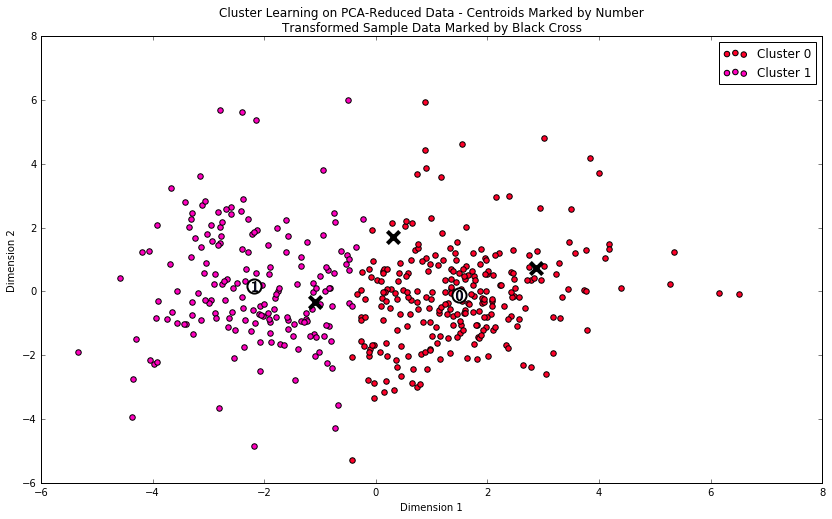

In [34]:
# Chose n_clusters = 2 based on silhouette score  
# Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=10).fit(reduced_data)
    
# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [39]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


# Examine differences from observed means
good_unscaled_data = data.drop(data.index[outliers_for_exclusion]).reset_index(drop = True)
print("Mean values:")
display(np.around(good_unscaled_data.mean().values))

print("Differences from mean:")
display(true_centers - np.around(good_unscaled_data.mean().values))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


Mean values:


array([ 12089.,   5788.,   7911.,   3096.,   2848.,   1537.])

Differences from mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3222.0,-3891.0,-5434.0,-1008.0,-2554.0,-856.0
Segment 1,-8084.0,2112.0,4193.0,-2144.0,1713.0,-501.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** To answer this question, I looked at the data set description from the UCI Machine Learning Repository and saw that based on Channel frequency, there are two distinct groups of customers for this wholesaler, specifically Hotel/Restaurant/Cafes and Retail, meaning that these two segments represent one of these customer groups. Based on the differences from the computed means of the data set, it would appear that Segment 0 reflects Hotels, Restaurants and Cafes since it is lower than the mean across all product categories. Segment 1 would likely represent Retail then as this segment's central points in terms of Milk, Grocery, and Detergents_Paper, are all above the data set's mean measurements which would be reflective of retail locations such as grocery stores.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [40]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:** Sample Point 0 (Index 0) is predicted to be in Cluster 1, meaning that it would be retail which is different from the original prediction of a cafe, which would be in Cluster 0. This was different than expected based on the sample's higher than average milk expenditure but is consistent with the sample's other points and as a note, the point on the visualization is relatively close to the Cluster 1 boundary. Sample Point 1 (Index 1) is predicted to be part of the Hotel/Restaurant/Cafe customer segment which is in line with the earlier prediction that the customer is a fast food restaurant due to the higher than average spend on frozen goods. Sample Point 2 (Index 2) is also predicted to be in the Hotel/Restaurant/Cafe segment, which is in line iwth the prediction of it being a convenience store.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Essentially, for this A/B test to be effective, the wholesaler will need to select a sample from each cluster and then divide the sample (ensuring the sample size post-division can offer statistically significant results) into two groups, the control group which will receive the same delivery schedule of 5 days a week and the treatment group, which will receive deliveries 3 days a week. After a period of one month, the distributor can survey all of the different customers from each cluster sample and ask them to rate the delivery schedule on a scale of 1-5, looking for a statistically significant difference in satisfaction. This would mean that hypothetically speaking, for Cluster 0, the treatment sample would rate deliveries for the month at an average of 4.2 while the control sample would rate them at an average of 3.5. We can then see whether the p-value is below 0.05 for the difference between the two ensuring that we can reject the null hypothesis that changing the delivery schedule had no impact on the positive difference in satisfaction scores.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The clustering provides us with another categorical variable that can be used as a predictor, along with the estimated product spending, to determine what customer segment the 10 new customers are a part of, the target variable in this supervised learning problem. All of the existing customers would be in a customer segment, the engineered categorical feature, and thus, the clusters along with the spend would give you insight into how these predictors affect this categorization.   

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

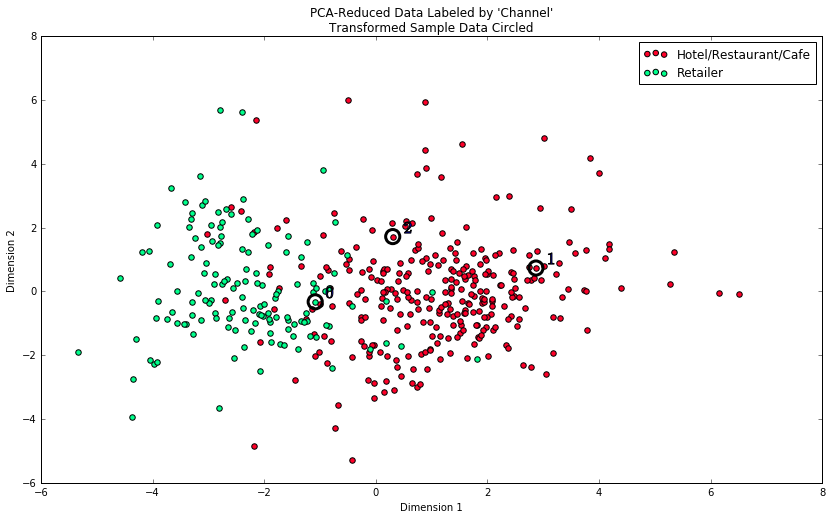

In [43]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers_for_exclusion, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm does relatively alright when looking at the visualization's underlying distribution and the central tendencies of the underlying data. As noted, Sample Point 0 might be in the Hotel/Restaurant/Cafe customer segment based on the sample observation's means and it is relatively close to the cluster boundaries with the nearest neighboring point actually classified in the Hotel/Restaurant/Cafe segment. Sample Point's 1 and 2 are in line with the mean product expenditures as noted above though I would call attention to the fact that this likely should be re-examined with the current decision boundaries based on the cluster centers misclassifying several points.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.